In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['target'] = iris.target

In [15]:
df['flower_name'] = df.target.apply(lambda i:iris.target_names[i])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
from sklearn.model_selection import train_test_split


In [18]:
X = df.drop(['target','flower_name'],axis = 'columns')

In [19]:
y = df.target

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7)

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model = RandomForestClassifier(n_estimators = 50)

In [58]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [59]:
model.score(X_test, y_test)

0.9555555555555556

In [61]:
y_predicted = model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
cm = confusion_matrix(y_test,y_predicted)

In [64]:
cm

array([[15,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 15]], dtype=int64)

Text(24.0, 0.5, 'Truth')

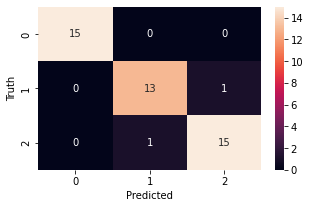

In [67]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')